# Stock Price EDA and Data Modeling



In [1]:
## Imporing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect


In [2]:
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# loading dataframe created earlier
df = pd.read_csv("Stock_data_prepared.csv")

# Basic Overview
print("Shape : ",df.shape)
print("========================================================")
print("Columns : ",df.columns.tolist())
print("========================================================")
print("Data type\n",df.dtypes)
display(df.head())

Shape :  (497472, 12)
Columns :  ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'PrevClose', 'DailyReturn', 'MA7', 'MA21', 'CumulativeReturn']
Data type
 symbol               object
date                 object
open                float64
high                float64
low                 float64
close               float64
volume                int64
PrevClose           float64
DailyReturn         float64
MA7                 float64
MA21                float64
CumulativeReturn    float64
dtype: object


,symbol,date,open,high,low,close,volume,PrevClose,DailyReturn,MA7,MA21,CumulativeReturn
0,A,2014-01-02,57.10,57.100,56.15,56.21,1916160,56.21,0.000000,56.210,56.210,0.000000
1,A,2014-01-03,56.39,57.345,56.26,56.92,1866651,56.21,0.012631,56.565,56.565,0.012631
2,A,2014-01-06,57.40,57.700,56.56,56.64,1777472,56.92,-0.004919,56.590,56.590,0.007650
3,A,2014-01-07,56.95,57.630,56.93,57.45,1463208,56.64,0.014301,56.805,56.805,0.022060
4,A,2014-01-08,57.33,58.540,57.17,58.39,2659468,57.45,0.016362,57.122,57.122,0.038783


In [3]:
# symbol_counts = df['symbol_encoded'].value_counts().sort_values()
# symbol_counts.describe()



## Data Quality Check

In [4]:
## Missing Values
print("Missing Values\n",df.isnull().sum())
print("========================================================")
## Duplicate values
print("duplicate values: ", df.duplicated().sum())
print("========================================================")
## Date range and unique stocks
print("Date range: ",df['date'].min(), "→",df['date'].max())
print("========================================================")
#print("No. of symbols: ",df['symbol_encoded'].nunique())


Missing Values
 symbol              0
date                0
open                0
high                0
low                 0
close               0
volume              0
PrevClose           0
DailyReturn         0
MA7                 0
MA21                0
CumulativeReturn    0
dtype: int64
duplicate values:  0
Date range:  2014-01-02 → 2017-12-29


In [5]:
df['date'] = pd.to_datetime(df['date'])


In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek


In [7]:
# import numpy as np
# df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
# df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
# df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)


In [8]:
#df = df.drop(columns=['date'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['symbol_encoded'] = le.fit_transform(df['symbol'])


In [10]:
#df = df.drop(columns=['symbol'])

In [11]:
df = df.copy()
df['Target'] = df.groupby('symbol_encoded')['close'].shift(-1)

feature = ['open', 'high', 'low', 'close', 'volume', 'PrevClose', 'DailyReturn',
       'MA7', 'MA21', 'CumulativeReturn', 'year', 'month', 'day', 'dayofweek',
       'symbol_encoded']


In [12]:
# droping NAN values which created by shifing 
df = df.dropna(subset=['Target'])

In [13]:
X = df[feature]
Y = df['Target']

In [14]:
print(df.columns)



Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'PrevClose',
       'DailyReturn', 'MA7', 'MA21', 'CumulativeReturn', 'year', 'month',
       'day', 'dayofweek', 'symbol_encoded', 'Target'],
      dtype='object')


In [15]:
# # Sort by date to mantain chronological order 

# df.sort_values(['symbol_encoded','date'])

# split_ratio = 0.8
# split_index = int(len(df) * split_ratio)

# X_train  = X.iloc[:split_index]
# X_test = X.iloc[split_index:]
# Y_train = Y.iloc[:split_index]
# Y_test = Y.iloc[split_index:]

In [16]:
# X_train_list, X_test_list, Y_train_list, Y_test_list = [], [], [], []

# # Split 80/20 for each symbol separately
# for symbol in df['symbol_encoded'].unique():
#     symbol_mask = df['symbol_encoded'] == symbol
#     X_symbol = X[symbol_mask]
#     Y_symbol = Y[symbol_mask]
    
#     if len(X_symbol) < 2:  # skip very short histories
#         continue
    
#     split_idx = int(len(X_symbol) * 0.8)
    
#     X_train_list.append(X_symbol.iloc[:split_idx])
#     X_test_list.append(X_symbol.iloc[split_idx:])
#     Y_train_list.append(Y_symbol.iloc[:split_idx])
#     Y_test_list.append(Y_symbol.iloc[split_idx:])

# # Concatenate results
# X_train = pd.concat(X_train_list)
# X_test = pd.concat(X_test_list)
# Y_train = pd.concat(Y_train_list)
# Y_test = pd.concat(Y_test_list)

# print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
# print(f"Unique symbols in train: {X_train['symbol_encoded'].nunique()}")
# print(f"Unique symbols in test: {X_test['symbol_encoded'].nunique()}")


In [17]:
# Minimum rows per symbol required to keep (to avoid tiny samples)
MIN_LEN = 50  

X_train_list, X_test_list, Y_train_list, Y_test_list = [], [], [], []

for symbol in df['symbol_encoded'].unique():
    symbol_mask = df['symbol_encoded'] == symbol
    X_symbol = X[symbol_mask]
    Y_symbol = Y[symbol_mask]
    
    # Skip stocks with too few records
    if len(X_symbol) < MIN_LEN:
        continue
    
    # Chronological split (80/20)
    split_idx = int(len(X_symbol) * 0.8)
    if split_idx == 0 or split_idx == len(X_symbol):  # safety check
        continue
    
    X_train_list.append(X_symbol.iloc[:split_idx])
    X_test_list.append(X_symbol.iloc[split_idx:])
    Y_train_list.append(Y_symbol.iloc[:split_idx])
    Y_test_list.append(Y_symbol.iloc[split_idx:])

# Combine everything back
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
Y_train = pd.concat(Y_train_list)
Y_test = pd.concat(Y_test_list)

# Sanity check
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
print(f"Unique symbols in train: {X_train['symbol_encoded'].nunique()}")
print(f"Unique symbols in test: {X_test['symbol_encoded'].nunique()}")


Train size: 397168, Test size: 99782
Unique symbols in train: 504
Unique symbols in test: 504


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(alpha=1),
    
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled,Y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(Y_test,preds)
    mse = mean_squared_error(Y_test,preds)
    r2 = r2_score(Y_test,preds)

    results[name] = {"MAE" : mae, "MSE": mse, "r2": r2}
    
df_results = pd.DataFrame(results).T

In [20]:
df_results

,MAE,MSE,r2
Linear Regression,0.868323,4.673557,0.999711
Ridge Regression,0.868368,4.671437,0.999711


In [21]:
results_df = pd.DataFrame({
    'symbol_encoded': df.loc[Y_test.index, 'symbol_encoded'].values,
    'symbol': le.inverse_transform(df.loc[Y_test.index, 'symbol_encoded'].values),
    'date': df.loc[Y_test.index, 'date'].values,
    'year': df.loc[Y_test.index, 'year'].values,
    'month': df.loc[Y_test.index, 'month'].values,
    'actual': Y_test.values,
    'predicted': preds
})


In [22]:
print(len(df['symbol'].unique()))       # 505
print(len(Y_test.index))
print(len(df.loc[Y_test.index, 'symbol'].unique()))  # 101


505
99782
504


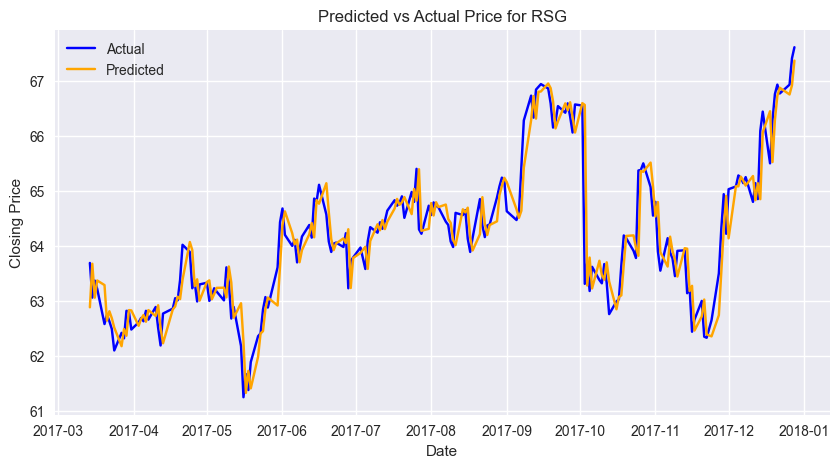

In [23]:
symbol = 'RSG'
mask = results_df['symbol'] == symbol
symbol_df = results_df.loc[mask].sort_values('date')

plt.figure(figsize=(10,5))
plt.plot(symbol_df['date'], symbol_df['actual'], label='Actual', color='blue')
plt.plot(symbol_df['date'], symbol_df['predicted'], label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Predicted vs Actual Price for {symbol}')
plt.legend()
plt.show()


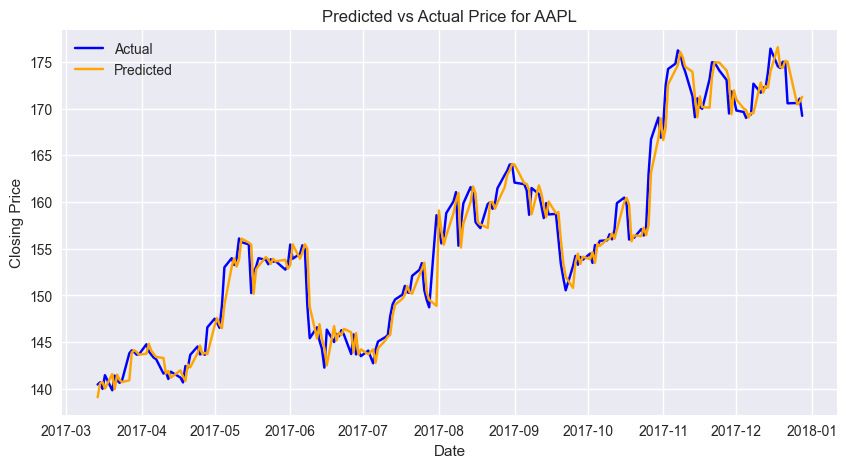

In [24]:
import matplotlib.pyplot as plt

symbol = 'AAPL'
mask = results_df['symbol'] == symbol

plt.figure(figsize=(10,5))
plt.plot(results_df.loc[mask, 'date'], results_df.loc[mask, 'actual'], label='Actual', color='blue')
plt.plot(results_df.loc[mask, 'date'], results_df.loc[mask, 'predicted'], label='Predicted', color='orange')

plt.title(f'Predicted vs Actual Price for {symbol}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


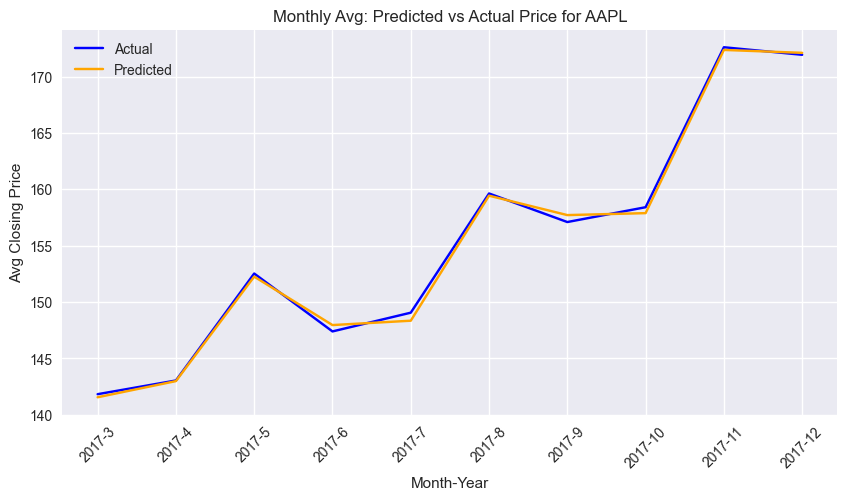

In [25]:
monthly_df = (
    results_df.groupby(['year','month','symbol'], as_index=False)
    .agg({'actual':'mean', 'predicted':'mean'})
)

mask = monthly_df['symbol'] == symbol
monthly_df['month_year'] = monthly_df['year'].astype(str) + '-' + monthly_df['month'].astype(str)

plt.figure(figsize=(10,5))
plt.plot(monthly_df.loc[mask, 'month_year'], monthly_df.loc[mask, 'actual'], label='Actual', color='blue')
plt.plot(monthly_df.loc[mask, 'month_year'], monthly_df.loc[mask, 'predicted'], label='Predicted', color='orange')
plt.xticks(rotation=45)
plt.title(f'Monthly Avg: Predicted vs Actual Price for {symbol}')
plt.xlabel('Month-Year')
plt.ylabel('Avg Closing Price')
plt.legend()
plt.show()


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [27]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU memory growth enabled.")
    except RuntimeError as e:
        print(e)


✅ GPU memory growth enabled.


In [28]:
model = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # stop after 5 bad epochs
    restore_best_weights=True
)


In [29]:
history = model.fit(
    X_train_scaled, Y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
11171/11171 [==============================] - 63s 5ms/step - loss: 66.0751 - mae: 2.8919 - val_loss: 6.5243 - val_mae: 1.7676
Epoch 2/200
11171/11171 [==============================] - 61s 5ms/step - loss: 17.1722 - mae: 1.8695 - val_loss: 2.4295 - val_mae: 1.0106
Epoch 3/200
11171/11171 [==============================] - 63s 6ms/step - loss: 13.9317 - mae: 1.6704 - val_loss: 8.4790 - val_mae: 2.0608
Epoch 4/200
11171/11171 [==============================] - 63s 6ms/step - loss: 12.0851 - mae: 1.6175 - val_loss: 2.5212 - val_mae: 1.0219
Epoch 5/200
11171/11171 [==============================] - 64s 6ms/step - loss: 11.4768 - mae: 1.5388 - val_loss: 2.5899 - val_mae: 1.0607
Epoch 6/200
11171/11171 [==============================] - 63s 6ms/step - loss: 10.0775 - mae: 1.4855 - val_loss: 3.0004 - val_mae: 1.2115
Epoch 7/200
11171/11171 [==============================] - 64s 6ms/step - loss: 9.2926 - mae: 1.4318 - val_loss: 2.2118 - val_mae: 0.9546
Epoch 8/200
11171/11171 [===

In [30]:
test_loss, test_mae = model.evaluate(X_test_scaled, Y_test)
print(f"Test MAE: {test_mae:.4f}")


3119/3119 [==============================] - 9s 3ms/step - loss: 6.5718 - mae: 1.3452
Test MAE: 1.3452


In [31]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, y_pred)
print(f"R² Score: {r2:.6f}")

3119/3119 [==============================] - 5s 2ms/step
R² Score: 0.999594


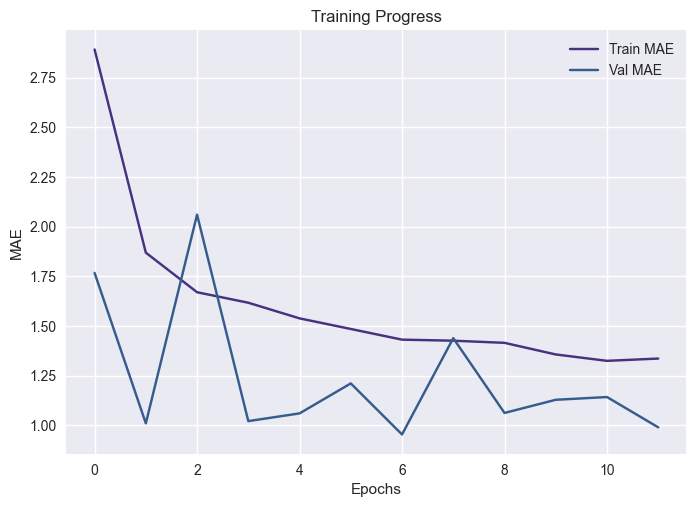

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Training Progress')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


3119/3119 [==============================] - 4s 1ms/step


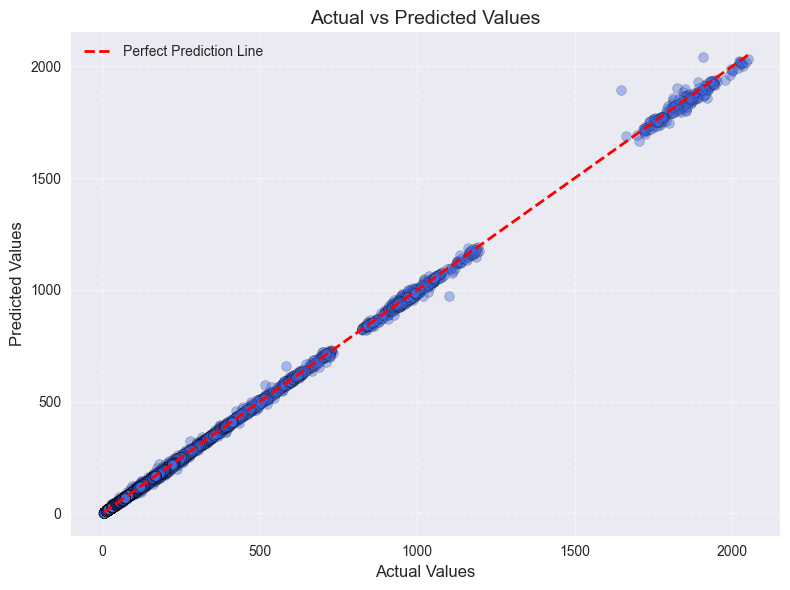

🔹 Correlation between Actual and Predicted: 0.9998


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
y_pred = model.predict(X_test_scaled).flatten()

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.4, color='royalblue', edgecolors='k')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--', lw=2, label='Perfect Prediction Line')

plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: print a quick correlation
corr = np.corrcoef(Y_test, y_pred)[0, 1]
print(f"🔹 Correlation between Actual and Predicted: {corr:.4f}")
